In [518]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [519]:
anime = pd.read_csv('../input/anime-recommendations-database/anime.csv')
rating = pd.read_csv('../input/anime-recommendations-database/rating.csv')

In [520]:
data.head()
data = pd.merge(rating, anime, on = 'anime_id')
data = data.drop('rating_x', axis = 1)
data = data.drop('episodes', axis = 1)
data.rename(columns = {'rating_y':'rating'}, inplace = True)
data

,user_id,anime_id,name,genre,type,rating,members
0,1,20,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,7.81,683297
1,3,20,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,7.81,683297
2,5,20,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,7.81,683297
3,6,20,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,7.81,683297
4,10,20,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,7.81,683297
...,...,...,...,...,...,...,...
7813722,65682,30450,Dr. Slump: Hoyoyo! Arale no Himitsu Dai Koukai...,"Comedy, Sci-Fi, Shounen",Special,6.17,248
7813723,69497,33484,Shiroi Zou,"Action, Historical, Kids",Movie,4.71,45
7813724,70463,29481,Kakinoki Mokkii,"Fantasy, Kids",Special,4.33,61
7813725,72404,34412,Hashiri Hajimeta bakari no Kimi ni,Music,Music,6.76,239


## Анализ ##
**Найдём количество уникальных названий аниме**

Найдём общее количество упомянутых сериалов и отсортируем весомые данные

In [521]:
data.name.unique()

array(['Naruto', 'School Rumble', 'Shuffle!', ..., 'Kakinoki Mokkii',
       'Hashiri Hajimeta bakari no Kimi ni',
       'Gamba: Gamba to Nakama-tachi'], dtype=object)

In [522]:
data['name'].nunique()

11196

In [523]:
Data = pd.DataFrame(columns = ['Anime', 'Genre', 'Streaming type', 'Rating', 'Views'])
Data['Anime'] = data.name
Data['Genre'] = data.genre
Data['Streaming type'] = data.type
Data['Rating'] = data.rating
Data['Views'] = data.members

Data = Data.drop_duplicates(subset='Anime')
Data.dropna(inplace = True)
Data = Data.sort_values(by = 'Views', ascending=False)
Data

,Anime,Genre,Streaming type,Rating,Views
1230847,Death Note,"Mystery, Police, Psychological, Supernatural, ...",TV,8.71,1013917
785881,Shingeki no Kyojin,"Action, Drama, Fantasy, Shounen, Super Power",TV,8.54,896229
627966,Sword Art Online,"Action, Adventure, Fantasy, Game, Romance",TV,7.83,893100
1325032,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,9.26,793665
307195,Angel Beats!,"Action, Comedy, Drama, School, Supernatural",TV,8.39,717796
...,...,...,...,...,...
7813677,Kissaten Soudou,Comedy,ONA,3.46,34
7813680,Nani no Yaku ni Mo Tatanai Karappona Hanashi,Comedy,ONA,3.50,33
7813617,Ukkari Pénélope (2013),"Kids, Slice of Life",TV,7.00,32
7813611,"Saitama-ken Zaijuu, Fujiyama Osamu, 33-sai, Mu...",Comedy,ONA,6.00,31


#  Анализ данных

**Мы подготовили нужные данные для последующей работы с ними**

In [524]:
print('Средний рейтинг всех аниме равен:',Data.Rating.mean().round(2))

Средний рейтинг всех аниме равен: 6.52


In [525]:
print('Медиана рейтинга аниме оказалась равна',Data.Rating.median())

Медиана рейтинга аниме оказалась равна 6.6


In [526]:
print('Модой рейтинга аниме является',Data.Rating.mode())

Модой рейтинга аниме является 0    6.0
dtype: float64


In [527]:
print('Среднее число просмотров находится на уровне',Data.Views.mean().round(0), 'просмотров')

Среднее число просмотров находится на уровне 19433.0 просмотров


In [528]:
print('Медианой числа просмотров является число',Data.Views.median())

Медианой числа просмотров является число 1825.0


,Anime,Rating,Views
1230847,Death Note,8.71,1013917
785881,Shingeki no Kyojin,8.54,896229
627966,Sword Art Online,7.83,893100
1325032,Fullmetal Alchemist: Brotherhood,9.26,793665
307195,Angel Beats!,8.39,717796
3424509,Code Geass: Hangyaku no Lelouch,8.83,715151
0,Naruto,7.81,683297
2563527,Steins;Gate,9.17,673572
1776355,Mirai Nikki (TV),8.07,657190
214883,Toradora!,8.45,633817


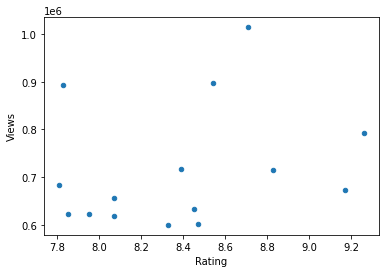

In [531]:
Top10MostPopular = Data.nlargest(n=15, columns = ['Views'])
Top10MostPopular = Top10MostPopular.drop(columns=['Streaming type', 'Genre'])
# Top10MostPopular.plot(kind = 'barh', x = 'Anime', y = 'Views', 
#                       title = 'Most popular anime, m. views')
Top10MostPopular.plot(kind = 'scatter', x = 'Rating', y = 'Views')
Top10MostPopular


,Anime,Rating,Views
7813154,Mogura no Motoro,9.50,62
6562411,Kimi no Na wa.,9.37,200630
1325032,Fullmetal Alchemist: Brotherhood,9.26,793665
5643726,Gintama°,9.25,114262
7813454,Yakusoku: Africa Mizu to Midori,9.25,53
2563527,Steins;Gate,9.17,673572
2599962,Gintama&#039;,9.16,151266
5052099,Haikyuu!!: Karasuno Koukou VS Shiratorizawa Ga...,9.15,93351
3676352,Hunter x Hunter (2011),9.13,425855
2877598,Gintama&#039;: Enchousen,9.11,81109


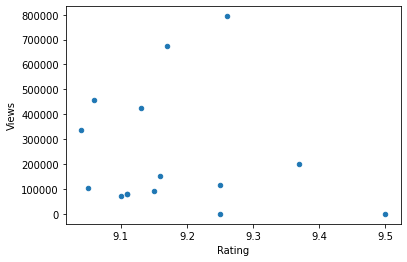

In [530]:
TopRated = Data.sort_values(by = 'Rating', ascending=False)
TopRated = Data.nlargest(n=15, columns = ['Rating'])
TopRated = TopRated.drop(columns=['Streaming type', 'Genre'])
TopRated.plot(kind = 'scatter', x = 'Rating', y = 'Views'  )
TopRated